In [1]:
from modules import CvtHSVLDic, GetWSIInfos, LoginWSIViewer, RegionMasking, ShowSelectHistogram, ShowOverlapMask
import openslide, pickle
import numpy as np

In [2]:
cur = LoginWSIViewer()
wsiluadinfo = GetWSIInfos(cur, "wsiluadinfo")

In [3]:
wsiluadinfo.keys()

dict_keys(['TCGA-38-A44F-01Z-00-DX1', 'TCGA-49-4488-01Z-00-DX1', 'TCGA-49-4494-01Z-00-DX5', 'TCGA-49-6743-01Z-00-DX2', 'TCGA-49-6744-01Z-00-DX1', 'TCGA-49-6744-01Z-00-DX4', 'TCGA-49-6745-01Z-00-DX4', 'TCGA-53-7813-01Z-00-DX1', 'TCGA-55-6987-01Z-00-DX1', 'TCGA-55-7573-01Z-00-DX1', 'TCGA-55-8507-01Z-00-DX1', 'TCGA-55-A492-01Z-00-DX1', 'TCGA-78-7633-01Z-00-DX1', 'TCGA-80-5608-01Z-00-DX1', 'TCGA-86-A4P7-01Z-00-DX1', 'TCGA-97-A4M2-01Z-00-DX1', 'TCGA-97-A4M5-01Z-00-DX1', 'TCGA-97-A4M7-01Z-00-DX2', 'TCGA-NJ-A4YF-01Z-00-DX1', 'TCGA-NJ-A4YQ-01Z-00-DX1', 'TCGA-O1-A52J-01Z-00-DX1'])

In [4]:
WSIID = "TCGA-38-A44F-01Z-00-DX1"

In [5]:
pathWSI = wsiluadinfo[WSIID]["filepath"]
handleWSI = openslide.OpenSlide(pathWSI)
coordinates = wsiluadinfo[WSIID]["corrdihuman"]["coordinates"]

In [6]:
img = np.array(handleWSI.read_region((0, 0), 2, handleWSI.level_dimensions[2]).convert("RGB"))
hsvlDic = CvtHSVLDic(img)

In [7]:
rangeSelectList = [{'h' : (128, 250), 's' : (20, 250), 'v' : (60, 240), 'l' : (20, 255)}]
gauthSelect = {"gX" : 31,"gS" : 21, "th" : 0.2}

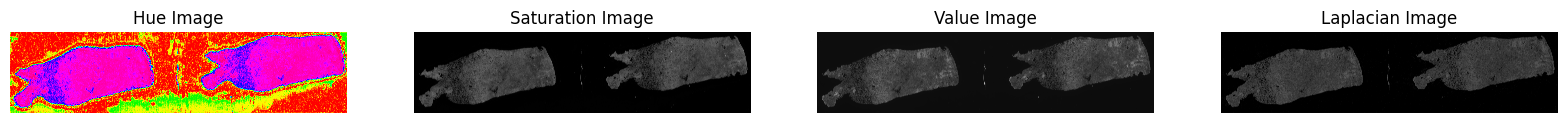

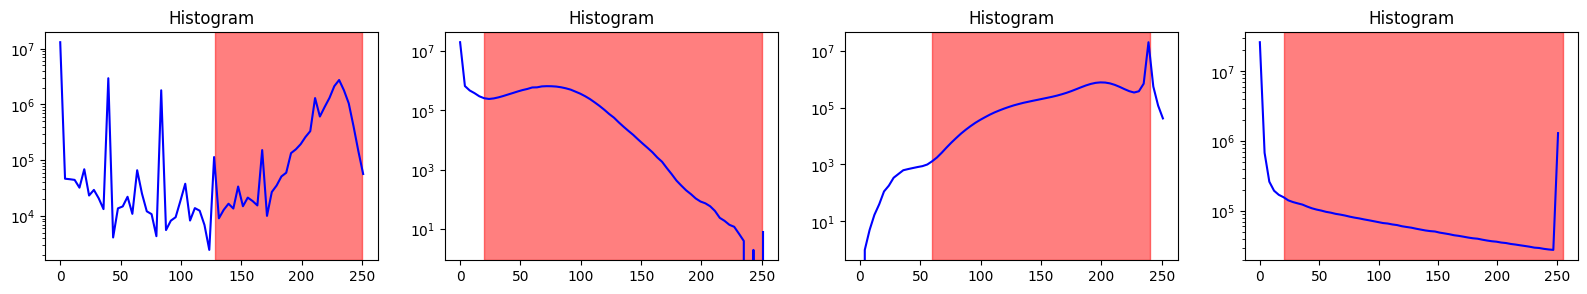

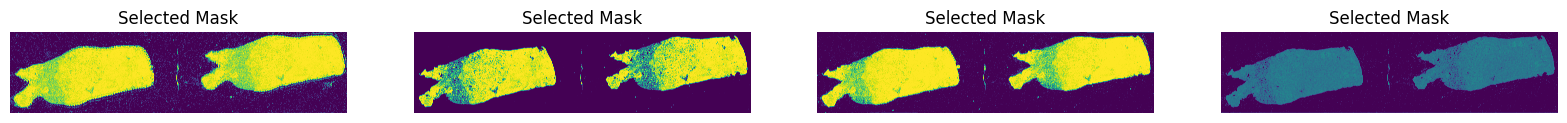

In [8]:
ShowSelectHistogram(hsvlDic, rangeSelectList[0])

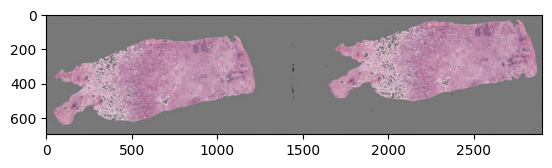

In [9]:
maskSpec = RegionMasking(hsvlDic, rangeSelectList, gauthSelect)
ShowOverlapMask(img, maskSpec, 1/4)

In [10]:
maskingOption = {}
maskingOption["rangeSelectList"] = rangeSelectList
maskingOption["gauthSelect"] = gauthSelect
pickle.dump(maskingOption, open("option_%s.dump"%(WSIID), "wb"))

In [1]:
dict([['a', 1], ['2', 3]])

{'a': 1, '2': 3}